
✅ Cleaned daily sentiment preview:
                       Date  sentiment_article_positive  \
0 2019-01-01 00:00:00+00:00                    0.384829   
1 2019-01-02 00:00:00+00:00                    0.339598   
2 2019-01-03 00:00:00+00:00                    0.360568   
3 2019-01-04 00:00:00+00:00                    0.478895   
4 2019-01-05 00:00:00+00:00                    0.398562   

   sentiment_article_neutral  sentiment_article_negative  
0                   0.339362                    0.275809  
1                   0.413057                    0.247345  
2                   0.376129                    0.263303  
3                   0.318257                    0.202848  
4                   0.239228                    0.362210  

✅ Plot saved successfully to /home/u762545/Thesis/Plots/article_sentiment_time_series.png


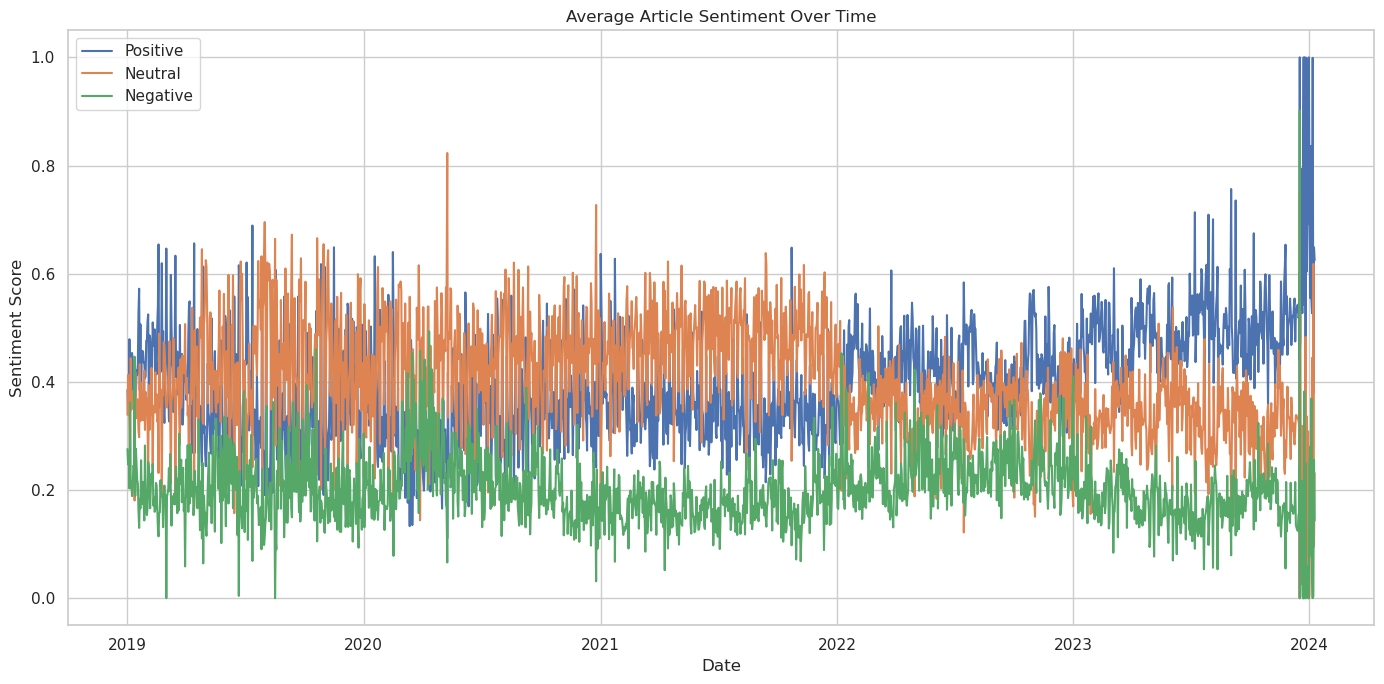

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# === Enable unbuffered stdout ===
#sys.stdout.reconfigure(line_buffering=True)

# === Load dataset ===
file_path = "../Data/FNS_with_sentiment_deduplicated.csv"
df = pd.read_csv(file_path, parse_dates=["Date"])

# === Basic cleanup ===
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.dropna(subset=["Date"])

sentiment_cols = [
    "sentiment_article_positive",
    "sentiment_article_neutral",
    "sentiment_article_negative"
]

# Ensure sentiment columns are numeric
df[sentiment_cols] = df[sentiment_cols].apply(pd.to_numeric, errors="coerce")
df = df.dropna(subset=sentiment_cols)

# === Group and aggregate ===
daily_sentiment = df.groupby("Date")[sentiment_cols].mean().reset_index()
daily_sentiment = daily_sentiment.dropna()

# ✅ Print check
print("\n✅ Cleaned daily sentiment preview:")
print(daily_sentiment.head())

# === Plotting ===
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(14, 7))

for col in sentiment_cols:
    ax.plot(daily_sentiment["Date"], daily_sentiment[col], label=col.split("_")[-1].capitalize())

ax.set_title("Average Article Sentiment Over Time")
ax.set_xlabel("Date")
ax.set_ylabel("Sentiment Score")
ax.legend()
ax.grid(True)

# === Save plot ===
os.makedirs("/home/u762545/Thesis/Plots", exist_ok=True)
plt.tight_layout()
plt.savefig("/home/u762545/Thesis/Plots/article_sentiment_time_series.png")
print("\n✅ Plot saved successfully to /home/u762545/Thesis/Plots/article_sentiment_time_series.png")



✅ Sentiment plot saved to /home/u762545/Thesis/Plots/article_sentiment_time_series.png

📉 Significant drop in article volume detected starting from: 2023-12-16
✅ Article volume drop plot saved to /home/u762545/Thesis/Plots/article_volume_drop_detection.png


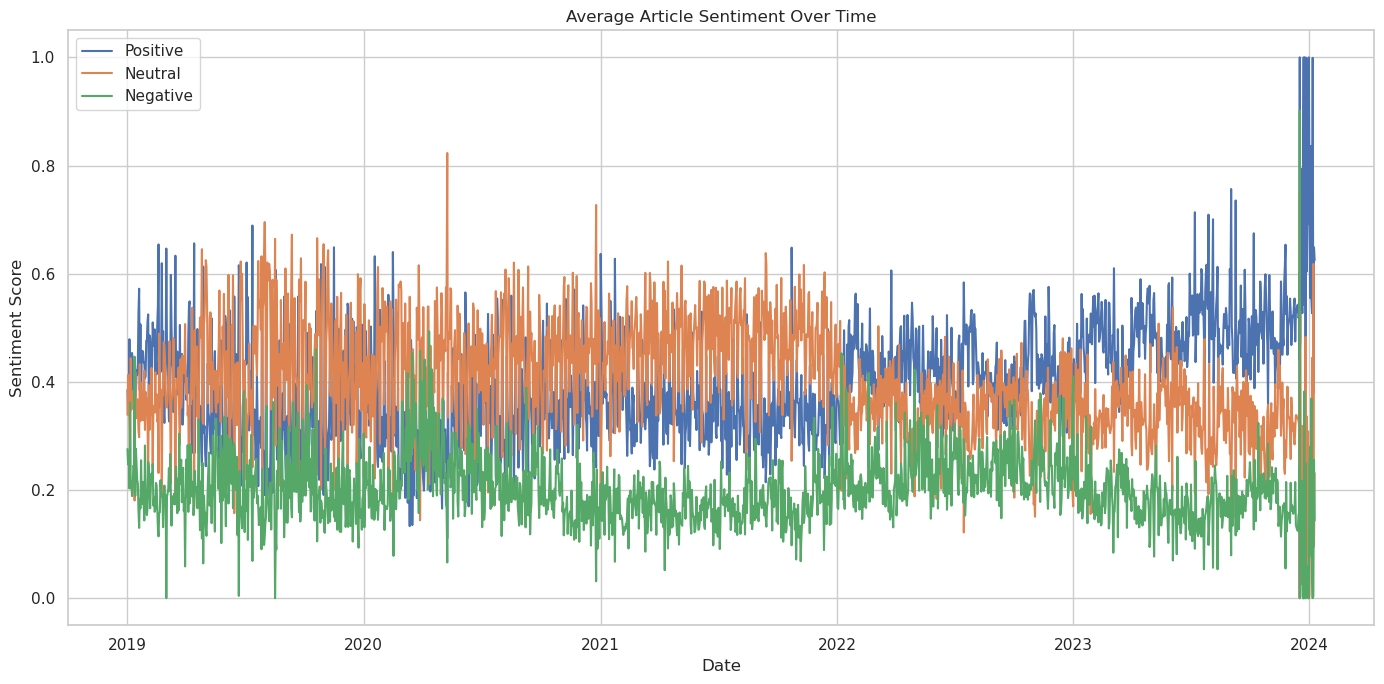

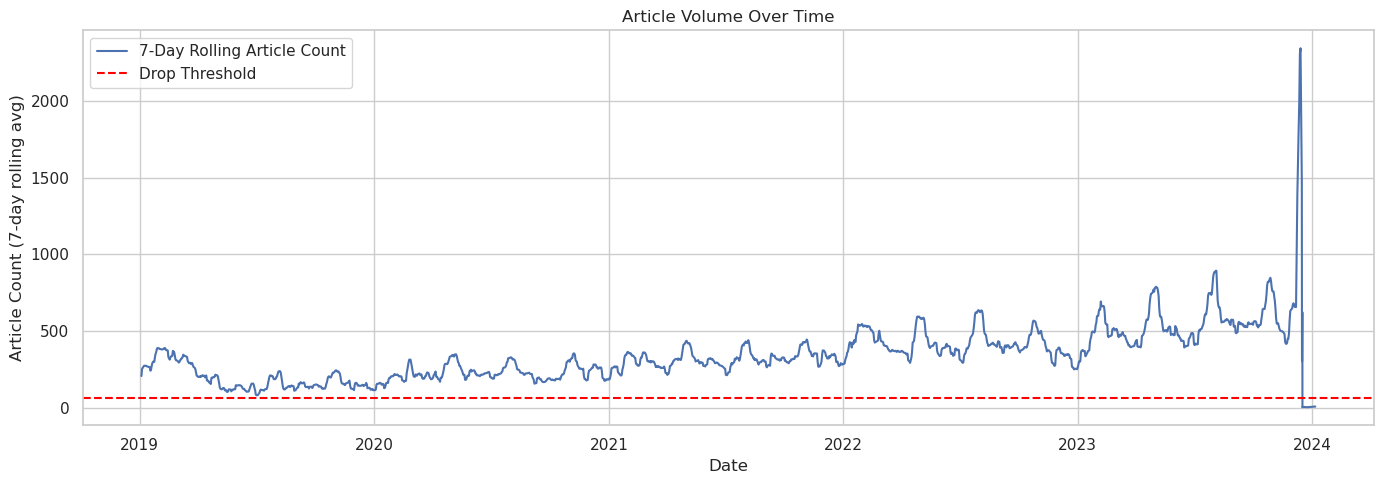

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# === Load dataset ===
file_path = "../Data/FNS_with_sentiment_deduplicated.csv"
df = pd.read_csv(file_path, parse_dates=["Date"])

# === Basic cleanup ===
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.dropna(subset=["Date"])

sentiment_cols = [
    "sentiment_article_positive",
    "sentiment_article_neutral",
    "sentiment_article_negative"
]

# Ensure sentiment columns are numeric
df[sentiment_cols] = df[sentiment_cols].apply(pd.to_numeric, errors="coerce")
df = df.dropna(subset=sentiment_cols)

# === Group and aggregate daily sentiment ===
daily_sentiment = df.groupby("Date")[sentiment_cols].mean().reset_index()
daily_sentiment = daily_sentiment.dropna()

# === Plot average sentiment over time ===
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(14, 7))

for col in sentiment_cols:
    ax.plot(daily_sentiment["Date"], daily_sentiment[col], label=col.split("_")[-1].capitalize())

ax.set_title("Average Article Sentiment Over Time")
ax.set_xlabel("Date")
ax.set_ylabel("Sentiment Score")
ax.legend()
ax.grid(True)

# === Save sentiment plot ===
os.makedirs("/home/u762545/Thesis/Plots", exist_ok=True)
plt.tight_layout()
plt.savefig("/home/u762545/Thesis/Plots/article_sentiment_time_series.png")
print("\n✅ Sentiment plot saved to /home/u762545/Thesis/Plots/article_sentiment_time_series.png")

# === Detect drop in article volume ===
# Count articles per day
article_counts = df.groupby("Date").size().reset_index(name="article_count")

# Smooth article counts (7-day rolling mean)
article_counts["rolling_count"] = article_counts["article_count"].rolling(window=7, center=True).mean()

# Define drop threshold (20% of average volume)
mean_volume = article_counts["rolling_count"].mean()
drop_threshold = 0.2 * mean_volume

# Find period where volume drops significantly
low_volume_period = article_counts[article_counts["rolling_count"] < drop_threshold]

# Identify the first such date
if not low_volume_period.empty:
    drop_start_date = low_volume_period["Date"].iloc[0]
    print(f"\n📉 Significant drop in article volume detected starting from: {drop_start_date.date()}")
else:
    print("\n✅ No significant drop detected in article volume.")

# === Plot article volume over time ===
plt.figure(figsize=(14, 5))
plt.plot(article_counts["Date"], article_counts["rolling_count"], label="7-Day Rolling Article Count")
plt.axhline(drop_threshold, color="red", linestyle="--", label="Drop Threshold")
plt.title("Article Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Article Count (7-day rolling avg)")
plt.legend()
plt.tight_layout()
plt.savefig("/home/u762545/Thesis/Plots/article_volume_drop_detection.png")
print("✅ Article volume drop plot saved to /home/u762545/Thesis/Plots/article_volume_drop_detection.png")


📉 Significant drop in article volume detected starting from: 2023-12-16

✅ Trimmed sentiment plot saved to /home/u762545/Thesis/Plots/article_sentiment_time_series_trimmed.png
✅ Trimmed article volume plot saved to /home/u762545/Thesis/Plots/article_volume_trimmed.png

✅ Dataset successfully trimmed at: 2023-12-16
✅ Remaining articles: 635610
✅ Final date in dataset: 2023-12-16


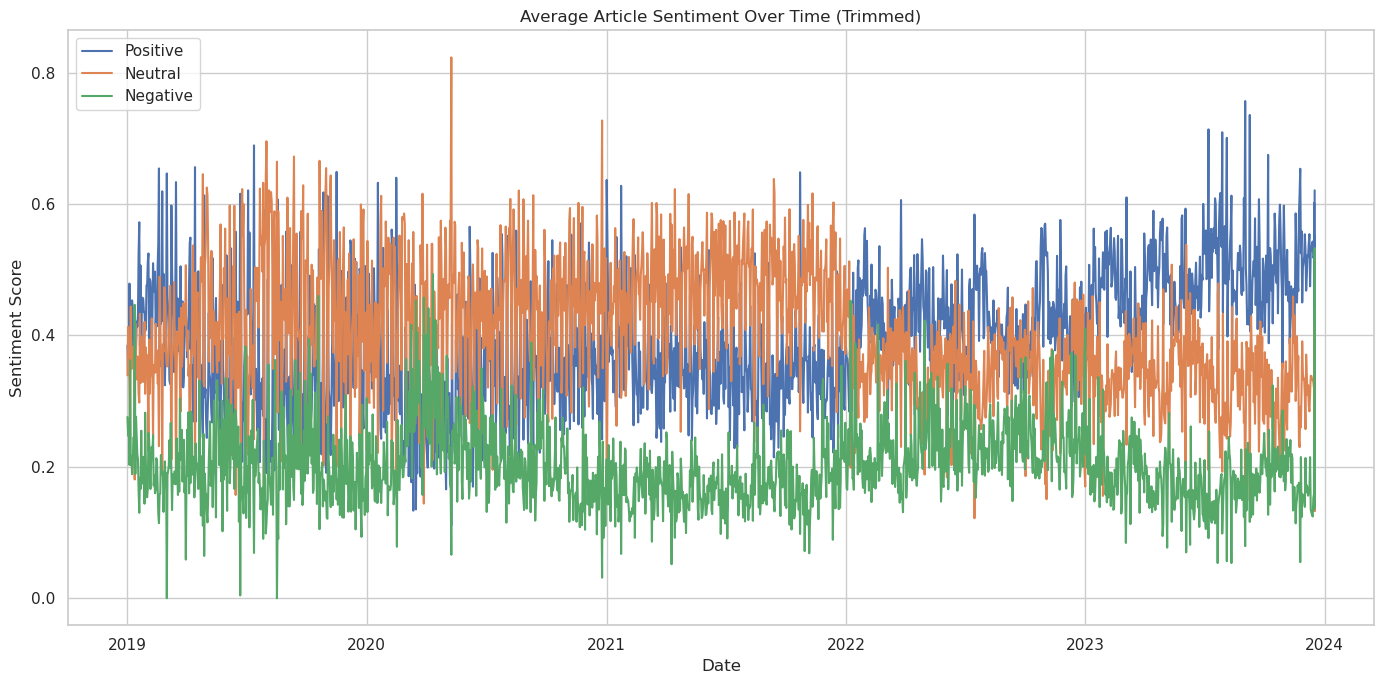

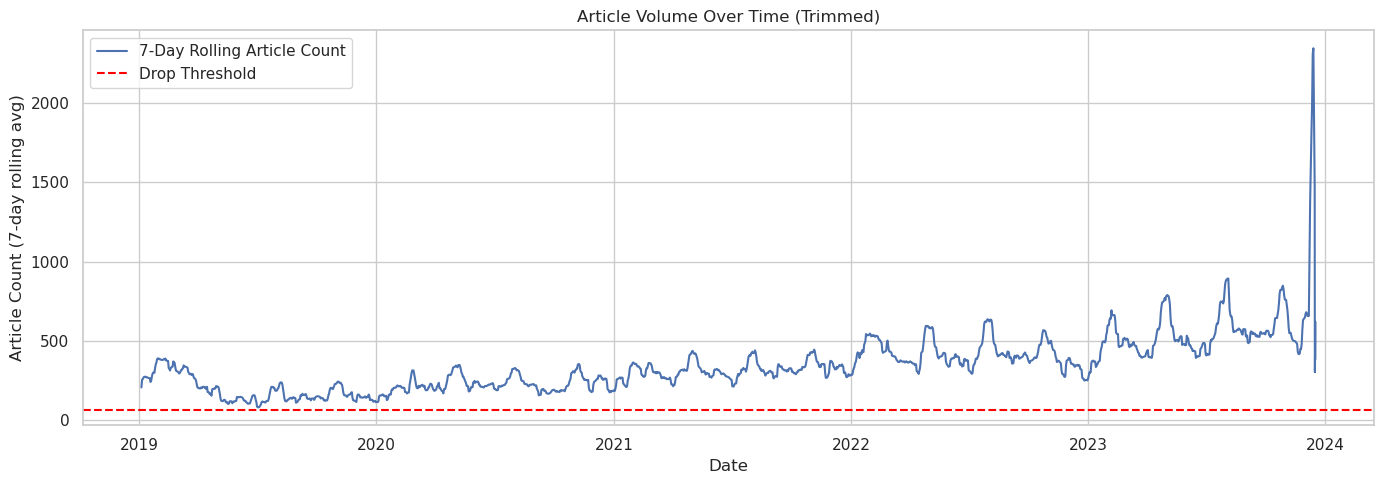

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# === Load dataset ===
file_path = "../Data/FNS_with_sentiment_deduplicated.csv"
df = pd.read_csv(file_path, parse_dates=["Date"])

# === Basic cleanup ===
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.dropna(subset=["Date"])

sentiment_cols = [
    "sentiment_article_positive",
    "sentiment_article_neutral",
    "sentiment_article_negative"
]

# Ensure sentiment columns are numeric
df[sentiment_cols] = df[sentiment_cols].apply(pd.to_numeric, errors="coerce")
df = df.dropna(subset=sentiment_cols)

# === Detect drop in article volume ===
# Count articles per day
article_counts = df.groupby("Date").size().reset_index(name="article_count")

# Smooth article counts (7-day rolling mean)
article_counts["rolling_count"] = article_counts["article_count"].rolling(window=7, center=True).mean()

# Define drop threshold (20% of average volume)
mean_volume = article_counts["rolling_count"].mean()
drop_threshold = 0.2 * mean_volume

# Find period where volume drops significantly
low_volume_period = article_counts[article_counts["rolling_count"] < drop_threshold]

# Identify the first such date
if not low_volume_period.empty:
    drop_start_date = low_volume_period["Date"].iloc[0]
    print(f"\n📉 Significant drop in article volume detected starting from: {drop_start_date.date()}")
else:
    drop_start_date = pd.Timestamp.max
    print("\n✅ No significant drop detected in article volume.")

# === Trim dataset to exclude low-coverage period ===
df_trimmed = df[df["Date"] < drop_start_date]

# === Regenerate daily sentiment based on trimmed data ===
daily_sentiment = df_trimmed.groupby("Date")[sentiment_cols].mean().reset_index()
daily_sentiment = daily_sentiment.dropna()

# === Plot average sentiment over time ===
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(14, 7))

for col in sentiment_cols:
    ax.plot(daily_sentiment["Date"], daily_sentiment[col], label=col.split("_")[-1].capitalize())

ax.set_title("Average Article Sentiment Over Time (Trimmed)")
ax.set_xlabel("Date")
ax.set_ylabel("Sentiment Score")
ax.legend()
ax.grid(True)

# === Save sentiment plot ===
output_dir = "/home/u762545/Thesis/Plots"
os.makedirs(output_dir, exist_ok=True)
plt.tight_layout()
sentiment_plot_path = os.path.join(output_dir, "article_sentiment_time_series_trimmed.png")
plt.savefig(sentiment_plot_path)
print(f"\n✅ Trimmed sentiment plot saved to {sentiment_plot_path}")

# === Recreate article count plot from trimmed data ===
article_counts_trimmed = df_trimmed.groupby("Date").size().reset_index(name="article_count")
article_counts_trimmed["rolling_count"] = article_counts_trimmed["article_count"].rolling(window=7, center=True).mean()

plt.figure(figsize=(14, 5))
plt.plot(article_counts_trimmed["Date"], article_counts_trimmed["rolling_count"], label="7-Day Rolling Article Count")
plt.axhline(drop_threshold, color="red", linestyle="--", label="Drop Threshold")
plt.title("Article Volume Over Time (Trimmed)")
plt.xlabel("Date")
plt.ylabel("Article Count (7-day rolling avg)")
plt.legend()
plt.tight_layout()
volume_plot_path = os.path.join(output_dir, "article_volume_trimmed.png")
plt.savefig(volume_plot_path)
print(f"✅ Trimmed article volume plot saved to {volume_plot_path}")

# === Final summary ===
print(f"\n✅ Dataset successfully trimmed at: {drop_start_date.date()}")
print(f"✅ Remaining articles: {len(df_trimmed)}")
print(f"✅ Final date in dataset: {df_trimmed['Date'].max().date()}")
